In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from scipy.signal import savgol_filter
import scipy.stats as stats
import seaborn as sns
from tsmoothie.smoother import *
from matplotlib.widgets import CheckButtons, Slider, Button
import math
%matplotlib widget


In [4]:
#Create dataframe 
df = pd.read_csv('dataDistance.csv')
def setUltrawide():
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))
setUltrawide()

index = []
for x in range(len(df['sample_date'])):

    index.append(pd.to_datetime((df['sample_date'][x]+' '+df['sample_time'][x])))
df.style.format({"DOB": lambda t: t.strftime("%d-%m-%Y")});

C:\Users\gulza\AppData\Local\Temp\ipykernel_2972\1906137122.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
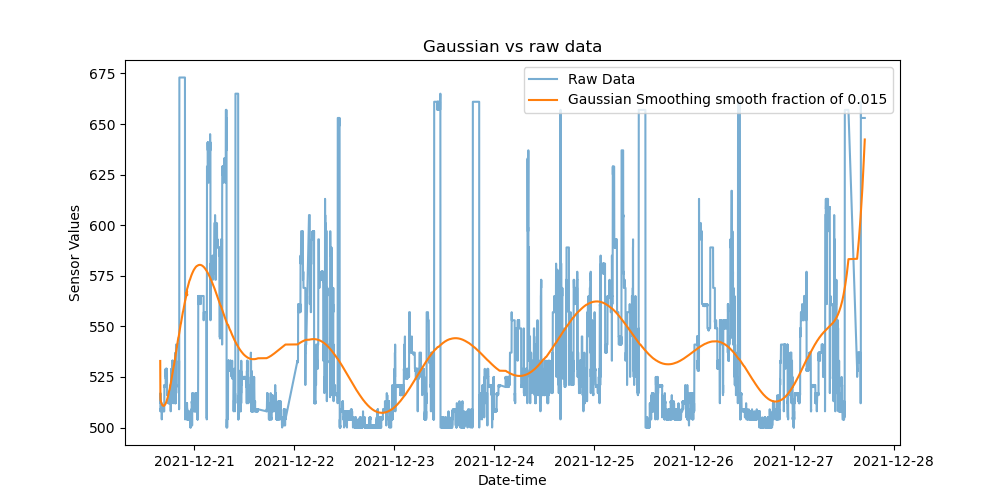

In [5]:
data = df['sensor_1']
gaussian = GaussianSmoother(sigma = 0.07, n_knots = 20)
gaussian.smooth(df['sensor_1'])
fig,ax = plt.subplots(figsize= (10,5))
plt.title("Gaussian vs raw data")
ax.plot(index, df['sensor_1'], label = 'Raw Data', alpha = 0.6)
ax.plot(index, gaussian.smooth_data[0], label = 'Gaussian Smoothing smooth fraction of 0.015')
ax.set_xlabel('Date-time')
ax.set_ylabel('Sensor Values')
ax.legend()

In [83]:
#overfitting
data = df['sensor_1']
lowess = LowessSmoother(smooth_fraction = 0.015)
lowess.smooth(df['sensor_1'])
fig1,ax1 = plt.subplots(figsize= (10,5))
ax1.set_title("LOWESS  Overfitting")
ax1.plot(index, df['sensor_1'], label = 'Raw Data', alpha = 0.6)
ax1.plot(index, lowess.smooth_data[0], label = 'LOWESS Smoothing')
ax1.set_xlabel('Date-time')
ax1.set_ylabel('Sensor Values')
ax1.legend()


KeyboardInterrupt



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
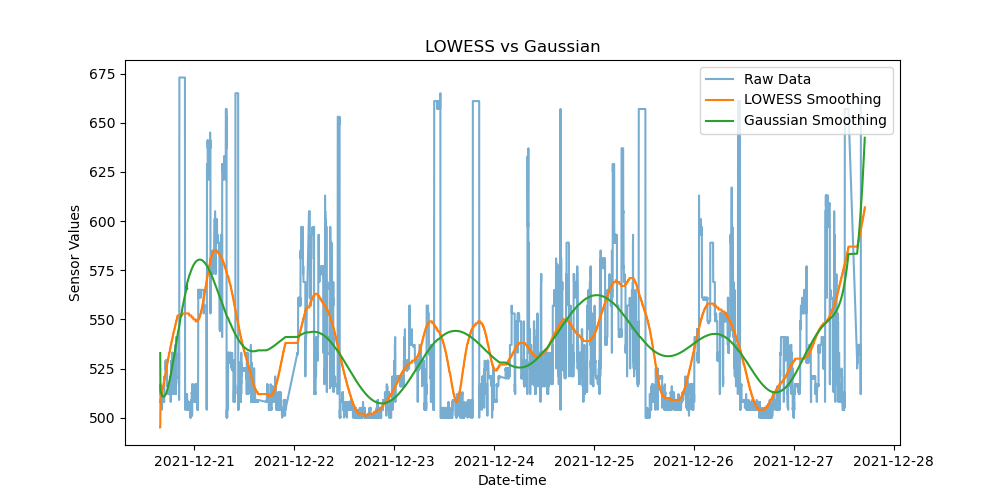

In [45]:
#lowess smoothing
data = df['sensor_1']
lowess = LowessSmoother(smooth_fraction = 0.065)
lowess.smooth(df['sensor_1'])
fig1,ax1 = plt.subplots(figsize= (10,5))
ax1.set_title("LOWESS vs Gaussian")
ax1.plot(index, df['sensor_1'], label = 'Raw Data', alpha = 0.6)
ax1.plot(index, lowess.smooth_data[0], label = 'LOWESS Smoothing')
ax1.plot(index, gaussian.smooth_data[0], label = 'Gaussian Smoothing')
ax1.set_xlabel('Date-time')
ax1.set_ylabel('Sensor Values')
ax1.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
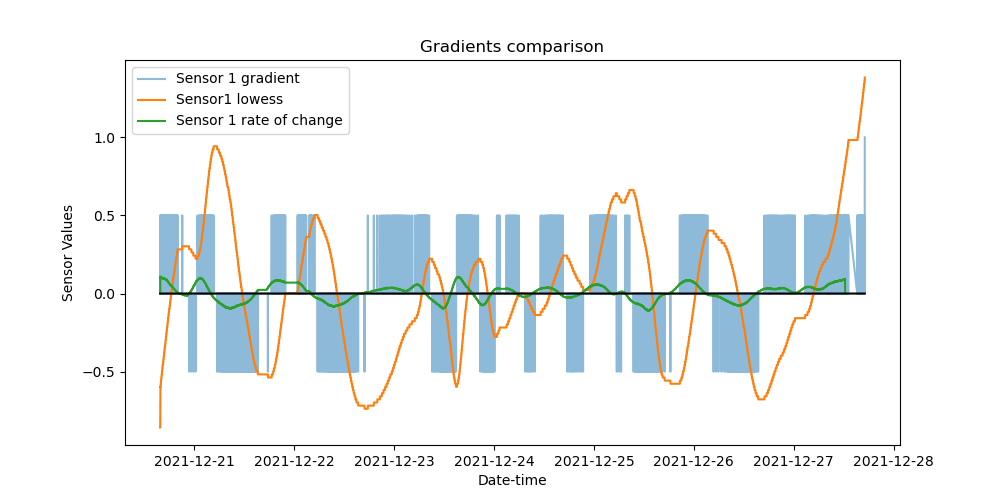

In [137]:
def rate_of_change(data,window):
    count = 0
    grad = []
    grad.append(0)
    for x in data:
        if(count+window<len(data)):
            dy = data[count+window] - x
            dx = window
            grad.append(dy/dx)
        count +=1
    grad.append(0)
    return grad 


fig2,ax2 = plt.subplots(figsize = (10,5))
sensor = df['sensor_1']
sensorROC = np.array(rate_of_change(lowess.smooth_data[0], 300)) 
gradIndex = index[0:len(sensorROC) ]
sensorGrad = np.array(lowess.smooth_data[0])
sensorGrad = np.gradient(sensorGrad)

ax2.plot(index, sensorGrad,label = 'Sensor 1 gradient', alpha = 0.5)


ax2.set_title('Gradients comparison')
ax2.plot(index,(lowess.smooth_data[0]-lowess.smooth_data.mean())/50, label = 'Sensor1 lowess')
ax2.plot(gradIndex, sensorROC, label = 'Sensor 1 rate of change')

ax2.plot(index,np.zeros(len(index)),color = 'black')
ax2.set_xlabel('Date-time')
ax2.set_ylabel('Sensor Values')
ax2.legend()

In [138]:
lowessCircumference  = LowessSmoother(smooth_fraction = 0.065)
lowessCircumference.smooth(df['circumference'])

<tsmoothie.smoother.LowessSmoother>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
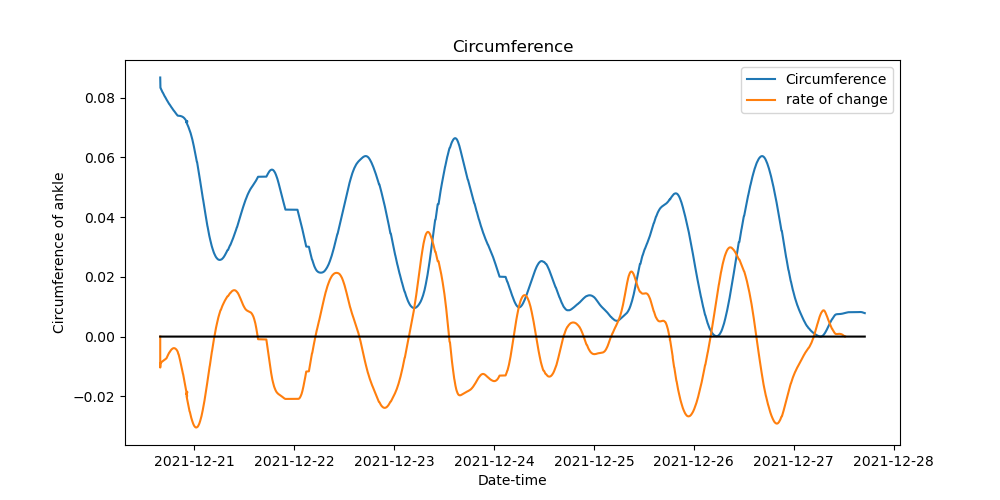

In [156]:
fig2,ax2 = plt.subplots(figsize = (10,5))
circumference = df['circumference']
circumferenceROC = np.array(rate_of_change(lowessCircumference.smooth_data[0], 300)) 

gradIndex = index[0:len(sensorROC) ]
sensorGrad = np.array(lowessCircumference.smooth_data[0])
sensorGrad = np.gradient(sensorGrad)



ax2.set_title('Circumference')
ax2.plot(index,(lowessCircumference.smooth_data[0]-lowessCircumference.smooth_data.min()), label = 'Circumference')
ax2.plot(gradIndex, circumferenceROC * 400, label = 'rate of change')

ax2.plot(index,np.zeros(len(index)),color = 'black')
ax2.set_xlabel('Date-time')
ax2.set_ylabel('Circumference of ankle')
ax2.legend()